## Markdown Anchors
### [Section A](#Section-A---Data-Exploration-&-Visualization)
### [Section B](#Section-B---Data-Pre-processing)
### [Section C](#Section-C---Home-team-winning)
### [Section D](#Section-D---Clustering)
### [Section E](#Section-E---Clustering-and-Dimensions-Reduction---Bonus)
### [Section F](#Section-F---Exploring-Players---Bonus)

### <font color='red'>Report for our solution:</font> 
- We used libraries like `plotly.express` to create interactive visualizations that enhance the comprehension and engagement of the analysis.
- The library `sklearn.decomposition` was employed for efficient dimensionality reduction, helping to simplify the models by extracting the most relevant features, which is vital for both enhancing performance and interpretability.
- We also used `precision_recall_curve`, it evaluates classifier performance by calculating precision and recall at various thresholds, helping to optimize the trade-off between capturing positives and minimizing false positives.
- We also used `precision_recall_curve`, it computes precision and recall for different probability thresholds to assess classifier performance.
- In the analysis of Section D, the `silhouette score` was employed to evaluate the clustering quality. This metric measures how similar each point is to its own cluster compared to other clusters, providing an insight into the cohesiveness and separation of the clusters. A higher silhouette score indicates better-defined clusters, enhancing the reliability of the clustering results.
- Additionally, we utilized `StandardScaler` to normalize the dataset before clustering. This preprocessing step ensures that each feature contributes equally to the distance calculations, thereby improving the clustering performance and the interpretability of the silhouette score.
- `AgglomerativeClustering` was also implemented as our clustering algorithm. This hierarchical approach builds clusters by iteratively merging the closest pairs of clusters, creating a tree-like structure. By combining this method with the silhouette score and data normalization via StandardScaler, we achieved more accurate and meaningful clustering results.
- To visualize the performance of our models in Section D, we used the `ROC curve`. This tool illustrates the true positive rate against the false positive rate at various threshold settings, providing a comprehensive view of the model's ability to distinguish between classes.
- We also calculated the Area Under the Curve `(AUC)` to quantify the performance of our model using the ROC curve. The AUC provides a single metric that summarizes the model's ability to discriminate between classes, with higher values indicating better performance.
- Lastly, Principal Component Analysis `(PCA)` was employed to reduce the dimensionality of our dataset in section E.

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import silhouette_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

### Load and print the datasets

In [2]:
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')
goalscorers = pd.read_csv('goalscorers.csv')

In [3]:
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [4]:
shootouts.head()

date    home_team         away_team       winner first_shooter
0  1967-08-22        India            Taiwan       Taiwan           NaN
1  1971-11-14  South Korea  Vietnam Republic  South Korea           NaN
2  1972-05-07  South Korea              Iraq         Iraq           NaN
3  1972-05-17     Thailand       South Korea  South Korea           NaN
4  1972-05-19     Thailand          Cambodia     Thailand           NaN

In [5]:
goalscorers.head()

date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False

## Section A - Data Exploration & Visualization

### Plot 1 - Match Outcomes

In [6]:
# Determine the match outcome
def determine_outcome(row):
    if row['home_score'] > row['away_score']:
        return 'Home Win'
    elif row['home_score'] < row['away_score']:
        return 'Away Win'
    else:
        return 'Draw'

# Determine the match outcomes
outcomes = results.apply(determine_outcome, axis=1)
outcome_counts = outcomes.value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# Bar plot
fig = px.bar(outcome_counts, x='Outcome', y='Count', title='Distribution of Match Outcomes',
             labels={'Count': 'Number of Matches'},
             hover_data={'Count': True},
             color='Outcome',
             color_discrete_map={'Home Win': 'green', 'Away Win': 'red', 'Draw': 'blue'})
fig.update_layout(title={'text': 'Match Outcomes', 'x':0.5, 'xanchor': 'center'})

# Plot display
fig.show()


#### Key Observations for Match Outcomes Distribution

- Home teams win the most frequently, indicating a significant home advantage.
- Away teams have the lower win count, suggesting challenges faced during away games.
- Draws are common, highlighting the need for strategies to convert close matches into wins.

### Plot 2 - Average goals scored by home, away teams over time

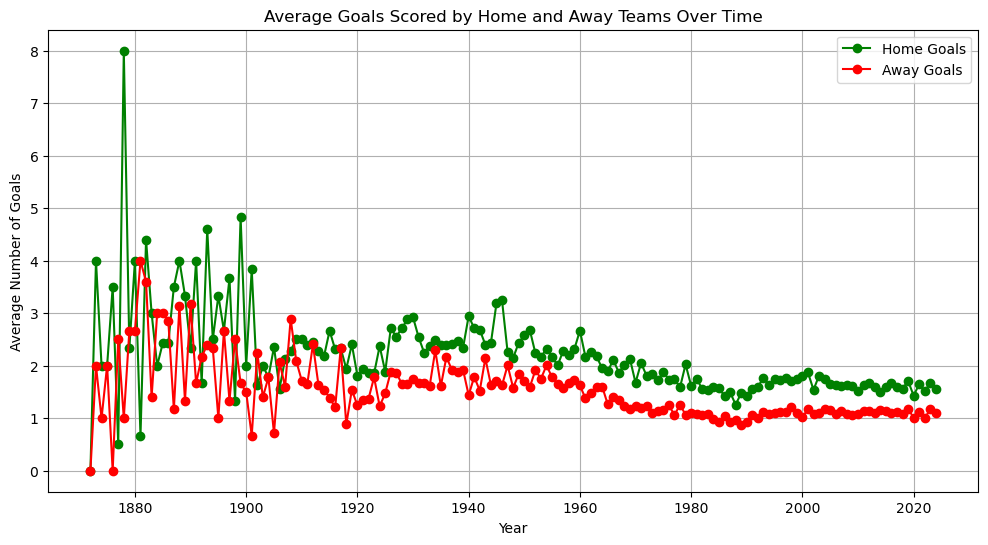

In [7]:
# Convert the date column to datetime
results['date'] = pd.to_datetime(results['date'])

# Extract the year from the date column
results_year = results['date'].dt.year

# Calculate the average goals per year for home and away teams
average_goals_per_year = results.groupby(results_year)[['home_score', 'away_score']].mean().reset_index()
average_goals_per_year.columns = ['Year', 'Home Goals', 'Away Goals']

# Line plot for average goals
plt.figure(figsize=(12, 6))
plt.plot(average_goals_per_year['Year'], average_goals_per_year['Home Goals'], marker='o', linestyle='-', color='green', label='Home Goals')
plt.plot(average_goals_per_year['Year'], average_goals_per_year['Away Goals'], marker='o', linestyle='-', color='red', label='Away Goals')
plt.title('Average Goals Scored by Home and Away Teams Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Goals')
plt.legend()
plt.grid(True)

# Plot display
plt.show()

#### Key Observations for Average Goals Scored by Home, Away Teams Over Time

- Home teams consistently score more goals on average than away teams, highlighting a persistent home advantage.

### Plot 3 - Average goals in matches with and without shootouts

In [8]:
# Ensure the date columns are of the same type
results['date'] = pd.to_datetime(results['date'])
shootouts['date'] = pd.to_datetime(shootouts['date'])

# Merge results and shootouts datasets
merged_data = results.merge(shootouts[['date', 'home_team', 'away_team']], on=['date', 'home_team', 'away_team'], how='left', indicator=True)

# Indicate if the match ended in a shootout
merged_data['shootout'] = merged_data['_merge'] == 'both'

# Calculate the average goals for matches with and without shootouts
average_goals_plotly = merged_data.groupby('shootout')[['home_score', 'away_score']].mean().sum(axis=1).reset_index()
average_goals_plotly.columns = ['Shootout', 'Average Goals']
average_goals_plotly['Shootout'] = average_goals_plotly['Shootout'].map({True: 'Shootout', False: 'No Shootout'})

# Bar plot
fig = px.bar(average_goals_plotly, x='Shootout', y='Average Goals', title='Average Goals in Matches with and without Penalty Shootouts',
             labels={'Average Goals': 'Average Number of Goals', 'Shootout': 'Match Type'},
             hover_data={'Average Goals': True},
             color='Shootout',
             color_discrete_map={'Shootout': 'orange', 'No Shootout': 'blue'})
fig.update_layout(title={'text': 'Average Goals in Matches with and without Penalty Shootouts', 'x':0.5, 'xanchor': 'center'})

# Display plot
fig.show()


#### Key Observations for Average Goals in Matches with and without Penalty Shootouts

- Matches ending in penalty shootouts tend to have a higher average number of goals, indicating closely contested and high-scoring games.
- This insight helps managers prepare for high-pressure situations, focusing on both offensive and defensive strategies to handle tightly contested matches effectively.

### Plot 4 - shootouts number over years

In [9]:
# Ensure the date column is in datetime format
shootouts['date'] = pd.to_datetime(shootouts['date'])

# Count the number of shootouts per year without adding a column
shootouts_per_year = shootouts['date'].dt.year.value_counts().reset_index()
shootouts_per_year.columns = ['Year', 'Number of Shootouts']
shootouts_per_year = shootouts_per_year.sort_values('Year')

# Create the plot
fig3_corrected = px.bar(shootouts_per_year, x='Year', y='Number of Shootouts', title='Number of Penalty Shootouts Over Years',
                        labels={'Number of Shootouts': 'Number of Shootouts', 'Year': 'Year'},
                        hover_data={'Number of Shootouts': True},
                        color='Number of Shootouts',
                        color_continuous_scale='Inferno')
fig3_corrected.update_layout(title={'text': 'Number of Penalty Shootouts Over Years', 'x':0.5, 'xanchor': 'center'})

# Show the plot
fig3_corrected.show()


#### Key Observations for Number of Penalty Shootouts Over the Years

- The number of penalty shootouts varies significantly over the years, indicating periods of increased match competitiveness.
- Peaks in certain years suggest changes in tournament formats or rules, leading to more closely contested games.

### Plot 5 - Goals scored by first and second halves

                             Number of goals in the first half vs the second half                             


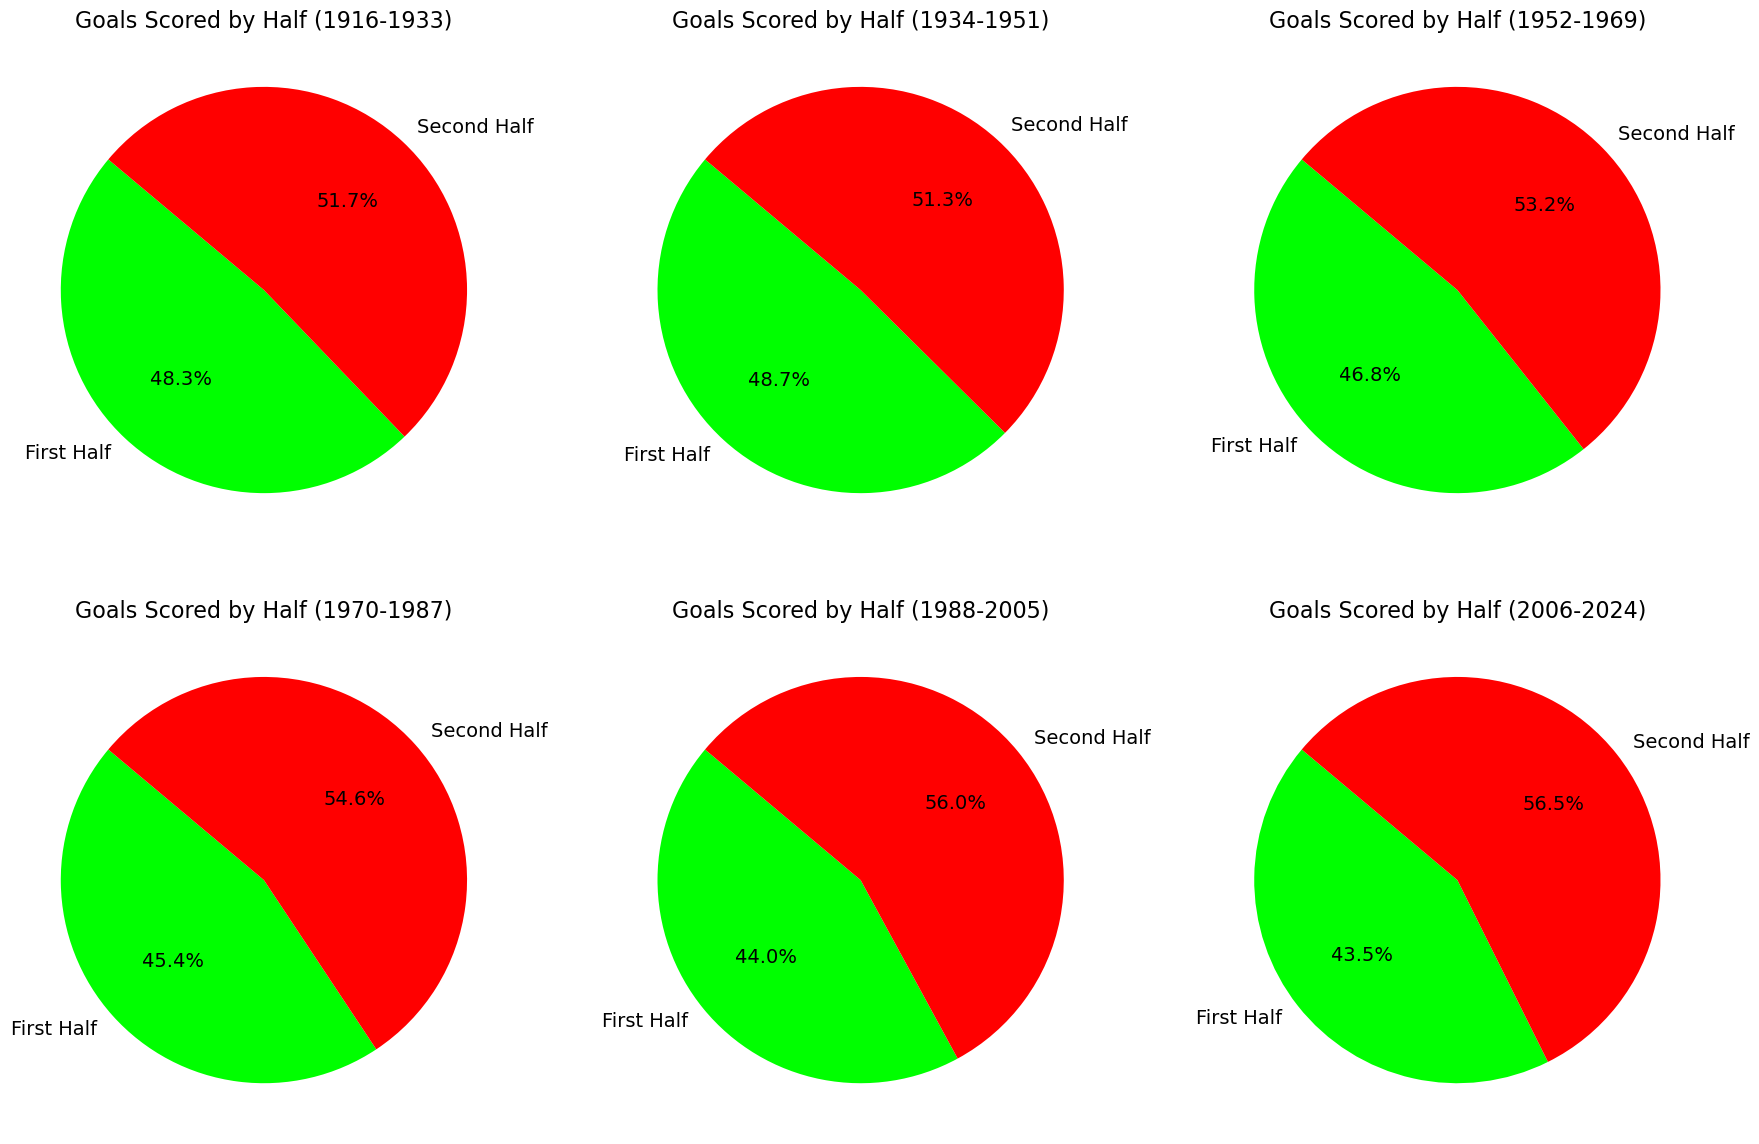

In [10]:
# Convert the date column to datetime in the goalscorers dataset
goalscorers['date'] = pd.to_datetime(goalscorers['date'])

# Set the number of periods for the analysis
num_periods = 6

# Determine the minimum and maximum year in the dataset
min_year = goalscorers['date'].dt.year.min()
max_year = goalscorers['date'].dt.year.max()

# Calculate the length of each period
period_length = (max_year - min_year) // num_periods

# Define the periods as tuples of (start_year, end_year)
periods = [(min_year + i * period_length, min_year + (i + 1) * period_length - 1) for i in range(num_periods)]
periods[-1] = (periods[-1][0], max_year)  # Adjust the last period to include the max_year

def calculate_goals_by_half_for_period(start_year, end_year):
    # Filter the data for the given period
    period_goals = goalscorers[(goalscorers['date'].dt.year >= start_year) & (goalscorers['date'].dt.year <= end_year)]
    # Calculate goals scored in the first and second half
    first_half_goals = period_goals[period_goals['minute'] <= 45].shape[0]
    second_half_goals = period_goals[period_goals['minute'] > 45].shape[0]
    return first_half_goals, second_half_goals

# Calculate the number of goals scored in each half for each period
goals_by_period = [calculate_goals_by_half_for_period(start_year, end_year) for start_year, end_year in periods]

# Define colors for the pie charts
colors = ['#00FF00', '#FF0000']

BLUE = '\033[94m'
BOLD = '\033[1m'
RESET = '\033[0m'
text = "Number of goals in the first half vs the second half"
formatted_text = f"{BOLD}{BLUE}{text.center(110)}{RESET}"

print(formatted_text)
plt.figure(figsize=(18, 12))
for i, (start_year, end_year) in enumerate(periods):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    first_half_goals, second_half_goals = goals_by_period[i]
    plt.pie([first_half_goals, second_half_goals], labels=['First Half', 'Second Half'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
    plt.title(f'Goals Scored by Half ({start_year}-{end_year})', fontsize=16, ha='center')

plt.tight_layout()

# Plot display
plt.show()


#### Key Observations for Team Managers
- Consistent Scoring Patterns: The distribution of goals scored in the first and second halves remains relatively balanced across different periods, indicating consistent match dynamics over time.
- Strategic Insights: Understanding these patterns can help managers focus on maintaining performance throughout the match, ensuring that the team remains competitive in both halves

### Plot 6 - Goals distribution by match period

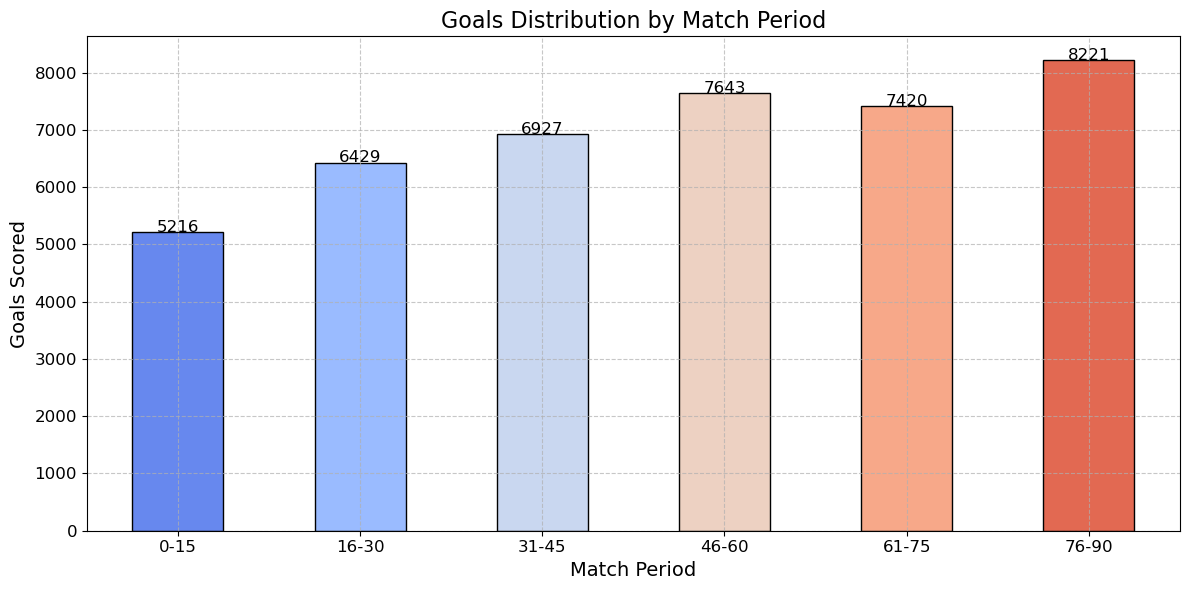

In [11]:
# Define the bins for dividing match minutes into periods
bins = [0, 15, 30, 45, 60, 75, 90]

# Define labels for each period
labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90']

# Categorize 'minute' column in goalscorers DataFrame into defined periods
goalscorers['period'] = pd.cut(goalscorers['minute'], bins=bins, labels=labels, right=False)

# Count the number of goals scored in each period and sort by period
goals_by_period = goalscorers['period'].value_counts().sort_index()

# Create a figure for plot
plt.figure(figsize=(12, 6))

# Generate a color palette for the bars
colors = sns.color_palette("coolwarm", len(labels))

# Plot the distribution of goals by period as a bar chart
goals_by_period.plot(kind='bar', color=colors, edgecolor='black')

# Add title and labels to the plot
plt.title('Goals Distribution by Match Period', fontsize=16)
plt.xlabel('Match Period', fontsize=14)
plt.ylabel('Goals Scored', fontsize=14)

# Customize the x and y ticks
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate the bars with the goal counts
for index, value in enumerate(goals_by_period):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Plot display
plt.show()


#### Key Observations for Team Manager:
- High Scoring in Final Minutes: The team scores the most goals in the '76-90' minutes period.
- Strategic Focus: Emphasize defensive strategies and conditioning in training to prevent conceding goals in the final minutes.

## Section B - Data Pre-processing

### Step 1: Implementation of features

#### 1. Home team won

In [12]:
# Adding "Home team won" feature
def determine_winner(row):
    if row['home_score'] > row['away_score']:
        return True
    else:
        return False
results['Home_team_won'] = results.apply(determine_winner, axis=1)
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  
0  Scotland    False          False  
1   England    False           True  
2  Scotland    False           True  
3   England    False          False  
4  Scotland    False           True

#### 2. Home team win rate

In [13]:
# Calculate the cumulative number of home wins and total home matches up to each match
cumulative_home_wins = results['Home_team_won'].cumsum()
cumulative_total_home_matches = results.reset_index().index + 1  

# Compute the home team win rate as the ratio of cumulative home wins to cumulative total home matches
results['home_team_win_rate'] = cumulative_home_wins / cumulative_total_home_matches
results.head()


date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  
0  Scotland    False          False            0.000000  
1   England    False           True            0.500000  
2  Scotland    False           True            0.666667  
3   England    False          False            0.500000  
4  Scotland    False           True            0.600000

#### 3. Away team win rate

In [14]:
# Add a column indicating whether the away team won the match
results['away_team_won'] = results['away_score'] > results['home_score']

# Calculate the cumulative number of away wins and total away matches up to each match
cumulative_away_wins = results['away_team_won'].cumsum()
cumulative_total_away_matches = results.reset_index().index + 1 

# Compute the away team win rate as the ratio of cumulative away wins to cumulative total away matches
results['away_team_win_rate'] = cumulative_away_wins / cumulative_total_away_matches

# Drop the 'away_team_won' column
results = results.drop(columns=['away_team_won'])
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  away_team_win_rate  
0  Scotland    False          False            0.000000                 0.0  
1   England    False           True            0.500000                 0.0  
2  Scotland    False           True            0.666667                 0.0  
3   England    False          False            0.500000                 0.0  
4  Scotland    False           True            0.600000                 0.0

#### 4. Home team average goals

In [15]:
# Calculate the cumulative sum of goals scored by the home team up to each match
cumulative_home_goals = results['home_score'].cumsum()

# Compute the home team average goals as the ratio of cumulative home goals to cumulative total home matches
results['home_team_avg_goals'] = cumulative_home_goals / cumulative_total_away_matches
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  away_team_win_rate  \
0  Scotland    False          False            0.000000                 0.0   
1   England    False           True            0.500000                 0.0   
2  Scotland    False           True            0.666667                 0.0   
3   England    False          False            0.500000                 0.0   
4  Scotland    False           True            0.600000                 0.0   

   home_team_avg_goals  
0                  0.0  
1                  2.0  
2                  2.0  
3                  2.0  
4                  2.2

#### 5. Away team average goals

In [16]:
# Calculate the cumulative sum of goals scored by the away team up to each match
cumulative_away_goals = results['away_score'].cumsum()

# Compute the away team average goals as the ratio of cumulative away goals to cumulative total matches
results['away_team_avg_goals'] = cumulative_away_goals / cumulative_total_away_matches
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  away_team_win_rate  \
0  Scotland    False          False            0.000000                 0.0   
1   England    False           True            0.500000                 0.0   
2  Scotland    False           True            0.666667                 0.0   
3   England    False          False            0.500000                 0.0   
4  Scotland    False           True            0.600000                 0.0   

   home_team_avg_goals  away_team_avg_goals  
0                  0.0                 0.00  
1                  2.0                 1.00  
2                  2.0                 1.00  
3                  2.0                 1.25  
4                  2.2                 1.00

#### Adding 6 more features of our own choosing
- goal difference for each match
- match result(Home Win , Away Win , Draw)
- clean sheets
- total goals in each match
- home and away teams won their previous matches
- home and away teams current winning streaks before each match
- head-to-head statistics for home and away teams before each match

#### 1. goal difference for each match

In [17]:
results['goal_difference'] = results['home_score'] - results['away_score']
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  away_team_win_rate  \
0  Scotland    False          False            0.000000                 0.0   
1   England    False           True            0.500000                 0.0   
2  Scotland    False           True            0.666667                 0.0   
3   England    False          False            0.500000                 0.0   
4  Scotland    False           True            0.600000                 0.0   

   home_team_avg_goals  away_team_avg_goals  goal_difference  
0                  0.0                 0.00              0.0  
1                  2.0                 1.00              2.0  
2                  2.0                 1.00              1.0  
3                  2.0                 1.25              0.0  
4                  2.2                 1.00              3.0

#### 2. match result(Home Win , Away Win , Draw)

In [18]:
results['match_result'] = results.apply(
    lambda row: 'Home Win' if row['home_score'] > row['away_score'] else ('Away Win' if row['home_score'] < row['away_score'] else 'Draw'), axis=1
)
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  away_team_win_rate  \
0  Scotland    False          False            0.000000                 0.0   
1   England    False           True            0.500000                 0.0   
2  Scotland    False           True            0.666667                 0.0   
3   England    False          False            0.500000                 0.0   
4  Scotland    False           True            0.600000                 0.0   

   home_team_avg_goals  away_team_avg_goals  goal_difference match_result  
0                  0.0                 0.00              0.0         Draw  
1                  2.0                 1.00              2.0     Home Win  
2                  2.0                 1.00              1.0     Home Win  
3                  2.0                 1.25              0.0         Draw  
4                  2.2                 1.00              3.0     Home Win

#### 3. clean sheets

In [19]:
# Add columns for clean sheets
results['home_team_clean_sheet'] = results['away_score'] == 0
results['away_team_clean_sheet'] = results['home_score'] == 0
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  away_team_win_rate  \
0  Scotland    False          False            0.000000                 0.0   
1   England    False           True            0.500000                 0.0   
2  Scotland    False           True            0.666667                 0.0   
3   England    False          False            0.500000                 0.0   
4  Scotland    False           True            0.600000                 0.0   

   home_team_avg_goals  away_team_avg_goals  goal_difference match_result  \
0                  0.0                 0.00              0.0         Draw   
1                  2.0                 1.00              2.0     Home Win   
2                  2.0                 1.00              1.0     Home Win   
3                  2.0                 1.25              0.0         Draw   
4                  2.2                 1.00              3.0     Home Win   

   home_team_clean_sheet  away_team_clean_sheet  
0                   True                   True  
1                  False                  False  
2                  False                  False  
3                  False                  False  
4                   True                  False

#### 4. total goals in every match

In [20]:
results['total_goals'] = results['home_score'] + results['away_score']
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  home_team_win_rate  away_team_win_rate  \
0  Scotland    False          False            0.000000                 0.0   
1   England    False           True            0.500000                 0.0   
2  Scotland    False           True            0.666667                 0.0   
3   England    False          False            0.500000                 0.0   
4  Scotland    False           True            0.600000                 0.0   

   home_team_avg_goals  away_team_avg_goals  goal_difference match_result  \
0                  0.0                 0.00              0.0         Draw   
1                  2.0                 1.00              2.0     Home Win   
2                  2.0                 1.00              1.0     Home Win   
3                  2.0                 1.25              0.0         Draw   
4                  2.2                 1.00              3.0     Home Win   

   home_team_clean_sheet  away_team_clean_sheet  total_goals  
0                   True                   True          0.0  
1                  False                  False          6.0  
2                  False                  False          3.0  
3                  False                  False          4.0  
4                   True                  False          3.0

#### 5. home and away teams won their previous matches

In [21]:
previous_home_match_win = {}

results['home_team_previous_match_win'] = False

for index, row in results.iterrows():
    home_team = row['home_team']
    if home_team in previous_home_match_win:
        results.at[index, 'home_team_previous_match_win'] = previous_home_match_win[home_team]
    previous_home_match_win[home_team] = row['home_score'] > row['away_score']
    
    
previous_away_match_win = {}

results['away_team_previous_match_win'] = False

for index, row in results.iterrows():
    away_team = row['away_team']
    if away_team in previous_away_match_win:
        results.at[index, 'away_team_previous_match_win'] = previous_away_match_win[away_team]
    previous_away_match_win[away_team] = row['away_score'] > row['home_score']


results.head()


date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  ...  away_team_win_rate  \
0  Scotland    False          False  ...                 0.0   
1   England    False           True  ...                 0.0   
2  Scotland    False           True  ...                 0.0   
3   England    False          False  ...                 0.0   
4  Scotland    False           True  ...                 0.0   

   home_team_avg_goals  away_team_avg_goals  goal_difference  match_result  \
0                  0.0                 0.00              0.0          Draw   
1                  2.0                 1.00              2.0      Home Win   
2                  2.0                 1.00              1.0      Home Win   
3                  2.0                 1.25              0.0          Draw   
4                  2.2                 1.00              3.0      Home Win   

  home_team_clean_sheet  away_team_clean_sheet  total_goals  \
0                  True                   True          0.0   
1                 False                  False          6.0   
2                 False                  False          3.0   
3                 False                  False          4.0   
4                  True                  False          3.0   

   home_team_previous_match_win  away_team_previous_match_win  
0                         False                         False  
1                         False                         False  
2                         False                         False  
3                          True                         False  
4                          True                         False  

[5 rows x 21 columns]

#### 6. home and away teams' current winning streaks before each match


In [22]:
results['home_team_winning_streak'] = 0
results['away_team_winning_streak'] = 0

home_winning_streak = {}
away_winning_streak = {}

for index, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    
    if home_team in home_winning_streak:
        results.at[index, 'home_team_winning_streak'] = home_winning_streak[home_team]
    else:
        results.at[index, 'home_team_winning_streak'] = 0
    
    if away_team in away_winning_streak:
        results.at[index, 'away_team_winning_streak'] = away_winning_streak[away_team]
    else:
        results.at[index, 'away_team_winning_streak'] = 0
    
    if row['home_score'] > row['away_score']:
        home_winning_streak[home_team] = home_winning_streak.get(home_team, 0) + 1
        away_winning_streak[away_team] = 0
    elif row['away_score'] > row['home_score']:
        away_winning_streak[away_team] = away_winning_streak.get(away_team, 0) + 1
        home_winning_streak[home_team] = 0
    else:
        home_winning_streak[home_team] = 0
        away_winning_streak[away_team] = 0

results.head()


date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  ...  away_team_avg_goals  \
0  Scotland    False          False  ...                 0.00   
1   England    False           True  ...                 1.00   
2  Scotland    False           True  ...                 1.00   
3   England    False          False  ...                 1.25   
4  Scotland    False           True  ...                 1.00   

   goal_difference  match_result  home_team_clean_sheet  \
0              0.0          Draw                   True   
1              2.0      Home Win                  False   
2              1.0      Home Win                  False   
3              0.0          Draw                  False   
4              3.0      Home Win                   True   

   away_team_clean_sheet total_goals  home_team_previous_match_win  \
0                   True         0.0                         False   
1                  False         6.0                         False   
2                  False         3.0                         False   
3                  False         4.0                          True   
4                  False         3.0                          True   

   away_team_previous_match_win  home_team_winning_streak  \
0                         False                         0   
1                         False                         0   
2                         False                         0   
3                         False                         1   
4                         False                         1   

   away_team_winning_streak  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 23 columns]

7. head-to-head statistics for home and away teams before each match


In [23]:
results['head_to_head_home_wins'] = 0
results['head_to_head_away_wins'] = 0
results['head_to_head_goal_difference'] = 0

head_to_head_home_wins = {}
head_to_head_away_wins = {}
head_to_head_goal_difference = {}

for index, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    matchup = (home_team, away_team)
    
    results.at[index, 'head_to_head_home_wins'] = head_to_head_home_wins.get(matchup, 0)
    results.at[index, 'head_to_head_away_wins'] = head_to_head_away_wins.get(matchup, 0)
    results.at[index, 'head_to_head_goal_difference'] = head_to_head_goal_difference.get(matchup, 0)
    
    if row['home_score'] > row['away_score']:
        head_to_head_home_wins[matchup] = head_to_head_home_wins.get(matchup, 0) + 1
    elif row['away_score'] > row['home_score']:
        head_to_head_away_wins[matchup] = head_to_head_away_wins.get(matchup, 0) + 1
    
    goal_difference = row['home_score'] - row['away_score']
    head_to_head_goal_difference[matchup] = head_to_head_goal_difference.get(matchup, 0) + goal_difference

results.head()


date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  Home_team_won  ...  home_team_clean_sheet  \
0  Scotland    False          False  ...                   True   
1   England    False           True  ...                  False   
2  Scotland    False           True  ...                  False   
3   England    False          False  ...                  False   
4  Scotland    False           True  ...                   True   

   away_team_clean_sheet  total_goals  home_team_previous_match_win  \
0                   True          0.0                         False   
1                  False          6.0                         False   
2                  False          3.0                         False   
3                  False          4.0                          True   
4                  False          3.0                          True   

   away_team_previous_match_win home_team_winning_streak  \
0                         False                        0   
1                         False                        0   
2                         False                        0   
3                         False                        1   
4                         False                        1   

   away_team_winning_streak  head_to_head_home_wins  head_to_head_away_wins  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       1                       0   
4                         0                       1                       0   

   head_to_head_goal_difference  
0                           0.0  
1                           0.0  
2                           0.0  
3                           2.0  
4                           1.0  

[5 rows x 26 columns]

### Explaination of our choice of features:
1. **Goal Difference for Each Match**: This feature represents the margin by which a team won or lost a match. It can provide insights into the dominance of a team in matches, helping the model to differentiate between closely contested games and those with clear winners, thus improving the prediction of match outcomes.


2. **Match Result (Home Win, Away Win, Draw)**: This  feature captures the outcome of each match. Including this feature helps the model to understand the distribution of match results, which is essential for predicting future outcomes and understanding team performance patterns.


3. **Clean Sheets**: This feature indicates whether a team prevented the opponent from scoring any goals in a match. It is a good indicator of defensive strength and can help in predicting match outcomes based on the defensive capabilities of teams.


4. **Total Goals in Each Match**: This feature sums the goals scored by both teams in a match. It provides information about the overall offensive nature of a match and can help in predicting high-scoring games or matches with fewer goals, which is useful for forecasting results and match dynamics.


5. **Home and Away Teams Won Their Previous Matches**: This feature captures the momentum or recent form of teams by indicating whether they won their last match. Teams with winning momentum are likely to continue performing well, and this feature can help in predicting future match outcomes based on recent performance trends.


6. **Home and Away Teams Current Winning Streaks**: This feature extends the previous one by considering the length of the winning streak. Longer winning streaks can indicate strong form and higher confidence, which can significantly impact match outcomes and help the model in making more accurate predictions.


7. **Head-to-Head goal difference for Home and Away Teams**: This feature aggregates past match results between the two teams, providing insights into historical performance. Teams with a strong head-to-head record against their opponent are more likely to perform well, making this feature valuable for predicting match outcomes based on historical rivalry.


#### Check for missing values

In [24]:
# Checking for missing values
missing_values = results.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


home_team                       15
away_team                       15
home_score                      58
away_score                      58
home_team_avg_goals             58
away_team_avg_goals             58
goal_difference                 58
total_goals                     58
head_to_head_goal_difference    14
dtype: int64

### Step 1: Imputation
#### Mean Imputation for Numerical Columns

In [25]:
# Mean imputation
numerical_cols = ['home_score', 'away_score', 'home_team_avg_goals', 'away_team_avg_goals', 'goal_difference', 'total_goals']
for col in numerical_cols:
    results[col].fillna(results[col].mean(), inplace=True)


#### Mode Imputation for Categorical Columns

In [26]:
# Mode imputation
categorical_cols = ['home_team', 'away_team', 'head_to_head_goal_difference']
for col in categorical_cols:
    results[col].fillna(results[col].mode()[0], inplace=True)


#### Check for missing values again

In [27]:
missing_values = results.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### Step 2: Transformation
#### Log Transformation for total_goals

In [28]:
results['total_goals'] = np.log1p(results['total_goals'])

### Step 4: Exclusion
#### Excluding the head_to_head_goal_difference Column

In [29]:
results.drop(columns=['head_to_head_goal_difference','neutral','city'], inplace=True)

### New data

In [30]:
results.head()

date home_team away_team  home_score  away_score tournament   country  \
0 1872-11-30  Scotland   England         0.0         0.0   Friendly  Scotland   
1 1873-03-08   England  Scotland         4.0         2.0   Friendly   England   
2 1874-03-07  Scotland   England         2.0         1.0   Friendly  Scotland   
3 1875-03-06   England  Scotland         2.0         2.0   Friendly   England   
4 1876-03-04  Scotland   England         3.0         0.0   Friendly  Scotland   

   Home_team_won  home_team_win_rate  away_team_win_rate  ...  match_result  \
0          False            0.000000                 0.0  ...          Draw   
1           True            0.500000                 0.0  ...      Home Win   
2           True            0.666667                 0.0  ...      Home Win   
3          False            0.500000                 0.0  ...          Draw   
4           True            0.600000                 0.0  ...      Home Win   

   home_team_clean_sheet  away_team_clean_sheet total_goals  \
0                   True                   True    0.000000   
1                  False                  False    1.945910   
2                  False                  False    1.386294   
3                  False                  False    1.609438   
4                   True                  False    1.386294   

   home_team_previous_match_win  away_team_previous_match_win  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                          True                         False   
4                          True                         False   

   home_team_winning_streak  away_team_winning_streak  head_to_head_home_wins  \
0                         0                         0                       0   
1                         0                         0                       0   
2                         0                         0                       0   
3                         1                         0                       1   
4                         1                         0                       1   

   head_to_head_away_wins  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 23 columns]

### Explanation of Each Step

**Imputation:**
- **Mean Imputation for Numerical Columns:** This replaces missing values with the average of the column, maintaining the overall distribution and ensuring that no data is lost.
- **Mode Imputation for Categorical Columns:** This replaces missing values with the most frequent category, preserving the most common class and the structure of the data.

**Transformation:**
- **Log Transformation:** Applying a log transformation to **`total_goals`** helps stabilize the variance in the data, making it more normally distributed

**Feature Selection:**
- **Exclusion of `head_to_head_goal_difference` :** Dropping this column, simplifies the model, reduces complexity, and can improve performance by focusing on better features.

We ensured that the dataset is clean, the distribution of numerical features is improved, and the model's performance is potentially got better by focusing on relevant features.

## Section C - Home team winning

### Data Preparation+Feature selection
#### Data that was chosen to get dropped:
1. **goal_difference**: Directly indicates the match outcome.
2. **date**: Not relevant to the prediction task.
3. **home_team** and **away_team**: Requires extensive one-hot encoding and indirectly captured by other features.
4. **home_score** and **away_score**: Directly reveals the final match scores.
5. **Home_team_won**: Target variable we are trying to predict.
6. **match_result**: Explicitly states the match outcome.
7. **away_team_clean_sheet** and **home_team_clean_sheet**: Reveals if a team conceded no goals, indicating match outcome.
8. **tournament** and **country**: Requires extensive one-hot encoding and adds complexity without much predictive power.
9. **home_team_previous_match_win** and **away_team_previous_match_win**: Less essential historical performance data, can lead to overfitting.

In [31]:
data = results.copy()

# Drop columns that reveal the match outcome, are categorical, or are irrelevant
columns_to_drop = ['goal_difference','date', 'home_team', 'away_team', 'home_score', 'away_score', 'Home_team_won', 'match_result', 'away_team_clean_sheet', 'home_team_clean_sheet', 'tournament', 'country', 'home_team_previous_match_win', 'away_team_previous_match_win']
features = data.drop(columns=columns_to_drop)
target = data['Home_team_won'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Selection and Training

1. **Logistic Regression**
2. **Random Forest Classifier**
3. **Gradient Boosting Classifier**

#### Train and tune Decision tree model

In [32]:
# Logistic Regression
param_grid_lr = {
    'C': [ 0.1, 1],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)


In [33]:
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.6307448494453248


#### Train and tune Random forest model

In [34]:
# Random Forest classifier
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

In [35]:
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.6830427892234548


#### Train and tune Gradient boosting model

In [36]:
# Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

In [37]:
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.6851558372952985


In [38]:
# Create DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_gb]
})

# Plotting the results
fig = px.bar(results_df, x='Model', y='Accuracy', color='Model', text='Accuracy',
             title='Model Comparison', labels={'Accuracy': 'Accuracy', 'Model': 'Models'},
             color_discrete_sequence=['blue', 'green', 'orange'])
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

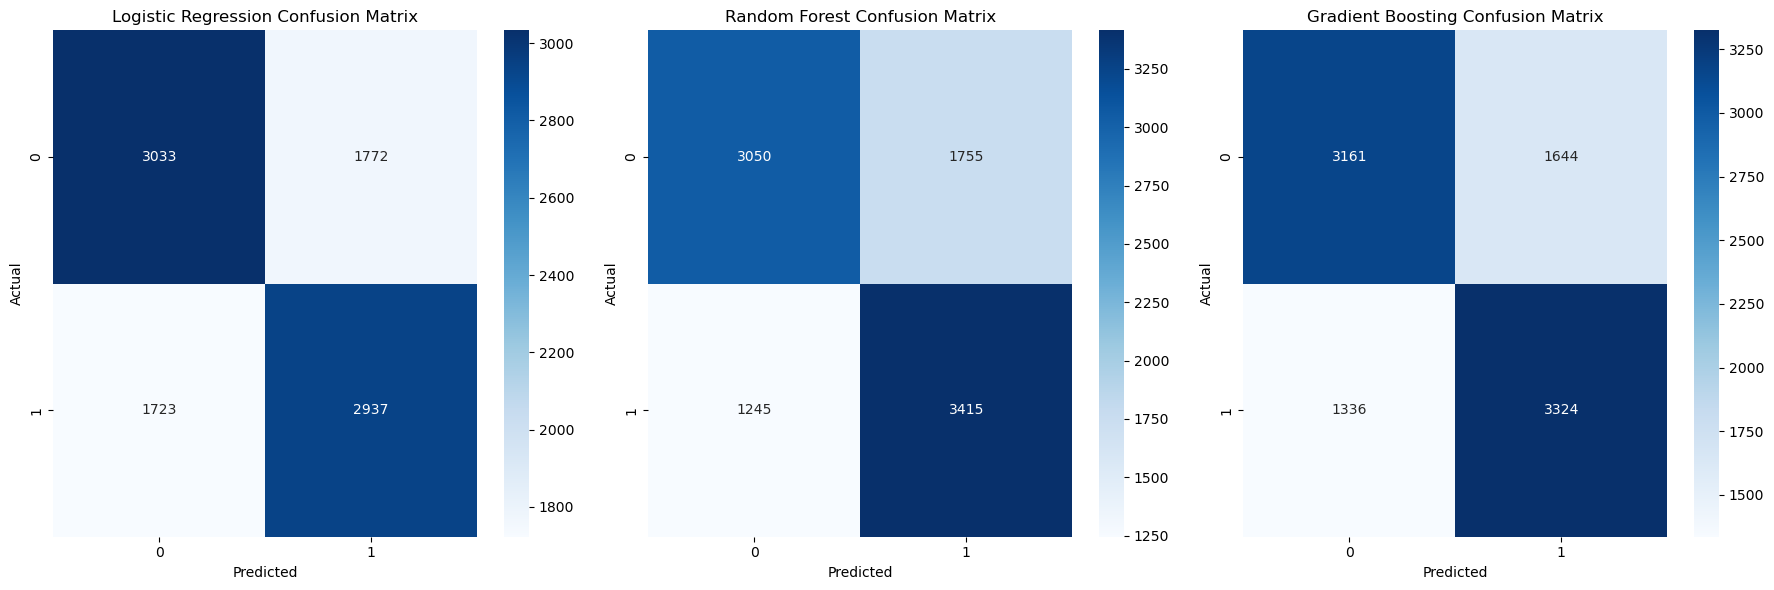

In [39]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
# Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, y_pred, title in zip(axes, [best_lr, best_rf, best_gb], [y_pred_lr, y_pred_rf, y_pred_gb], models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()


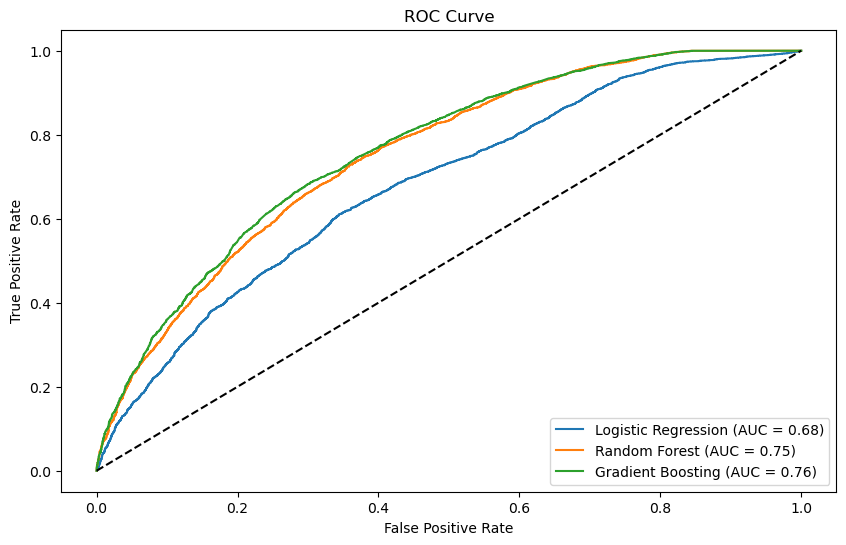

In [40]:
# ROC Curve
plt.figure(figsize=(10, 6))
for model, y_pred, title in zip([best_lr, best_rf, best_gb], [y_pred_lr, y_pred_rf, y_pred_gb], models):
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


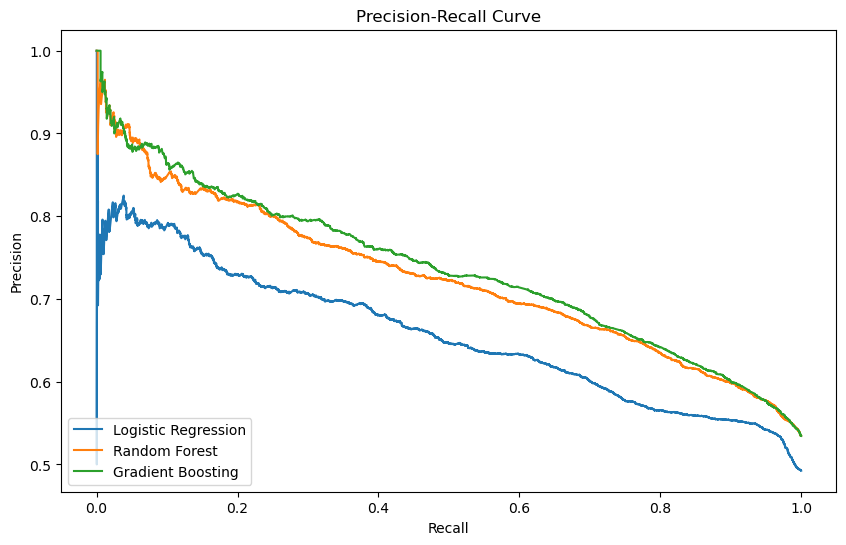

In [41]:
# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for model, y_pred, title in zip([best_lr, best_rf, best_gb], [y_pred_lr, y_pred_rf, y_pred_gb], models):
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{title}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### Discussion Points:

1. **Accuracy Comparison**:
    - Gradient Boosting had the best accuracy at 0.685, followed by Random Forest at 0.683, and Logistic Regression at 0.631. Gradient Boosting works well because it keeps improving on errors, making it good for tricky datasets. Random Forest also did well by using many decision trees to avoid mistakes and find patterns. Logistic Regression was simpler and easier to understand but not as accurate, showing it might miss some complex patterns in the data.


2. **Confusion Matrix**:
    - Confusion matrices show detailed results of each model's predictions, including true positives, true negatives, false positives, and false negatives. This helps us see if a model is better at predicting wins or losses.


3. **ROC Curve**:
    - ROC curves display the trade-off between true positive rate and false positive rate. A higher AUC (Area Under the Curve) means better performance. All three models should have good AUC values, indicating they perform well.


4. **Precision-Recall Curve**:
      - Precision-Recall curves are helpful for imbalanced datasets. They show the balance between precision (correct positive predictions) and recall (finding all positive cases). These curves help us see which model keeps high precision and recall, which is important when false positives or false negatives have different costs.


## Section D - Clustering

### 1. KMeans clustering
#### Step 1: Data Preparation - data aggregation

In [42]:
# Aggregate data for each team
teams = pd.concat([data['home_team'], data['away_team']]).unique()
team_data = pd.DataFrame(teams, columns=['team'])

# Calculate features for each team
team_features = []
for team in teams:
    home_games = data[data['home_team'] == team]
    away_games = data[data['away_team'] == team]
    
    total_games = len(home_games) + len(away_games)
    total_wins = home_games['Home_team_won'].sum() + away_games['Home_team_won'].sum()
    total_goals = home_games['home_score'].sum() + away_games['away_score'].sum()
    total_clean_sheets = home_games['home_team_clean_sheet'].sum() + away_games['away_team_clean_sheet'].sum()
    
    win_rate = total_wins / total_games if total_games > 0 else 0
    avg_goals = total_goals / total_games if total_games > 0 else 0
    clean_sheet_rate = total_clean_sheets / total_games if total_games > 0 else 0
    
    team_features.append([team, total_games, win_rate, avg_goals, clean_sheet_rate])

team_features_df = pd.DataFrame(team_features, columns=['team', 'total_games', 'win_rate', 'avg_goals', 'clean_sheet_rate'])


In [43]:
team_features_df.head()

team  total_games  win_rate  avg_goals  clean_sheet_rate
0          Scotland          831  0.474128   1.712040          0.318893
1           England         1066  0.421201   2.185861          0.410882
2             Wales          706  0.470255   1.240793          0.274788
3  Northern Ireland          687  0.461426   1.042213          0.256186
4     United States          754  0.542440   1.512945          0.368700

#### Step 2: Apply KMeans Clustering
#### 1. Standardize the features:



In [44]:
scaler = StandardScaler()
team_features_scaled = scaler.fit_transform(team_features_df.drop(columns=['team']))


#### 2. Apply KMeans Clustering:

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(team_features_scaled)

# Add the cluster labels to the team features dataframe
team_features_df['kmeans_cluster'] = kmeans_labels


#### Step 3: Identify Important Features
#### 1. Feature Importance using Random Forest:


In [46]:
rf_kmeans = RandomForestClassifier(n_estimators=100, random_state=42)
rf_kmeans.fit(team_features_scaled, kmeans_labels)
importances_kmeans = rf_kmeans.feature_importances_

feature_names = team_features_df.columns[1:-1]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'KMeans Importance': importances_kmeans,
}).sort_values(by='KMeans Importance', ascending=False)

print(importance_df)


            Feature  KMeans Importance
0       total_games           0.385956
3  clean_sheet_rate           0.241981
2         avg_goals           0.236989
1          win_rate           0.135073


#### Step 4: Estimate Quality of Clusters
#### 1. Calculate Silhouette Score:

In [47]:
silhouette_kmeans = silhouette_score(team_features_scaled, kmeans_labels)
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')


Silhouette Score for KMeans: 0.30153841017203825


#### 2. Visualize Clusters:

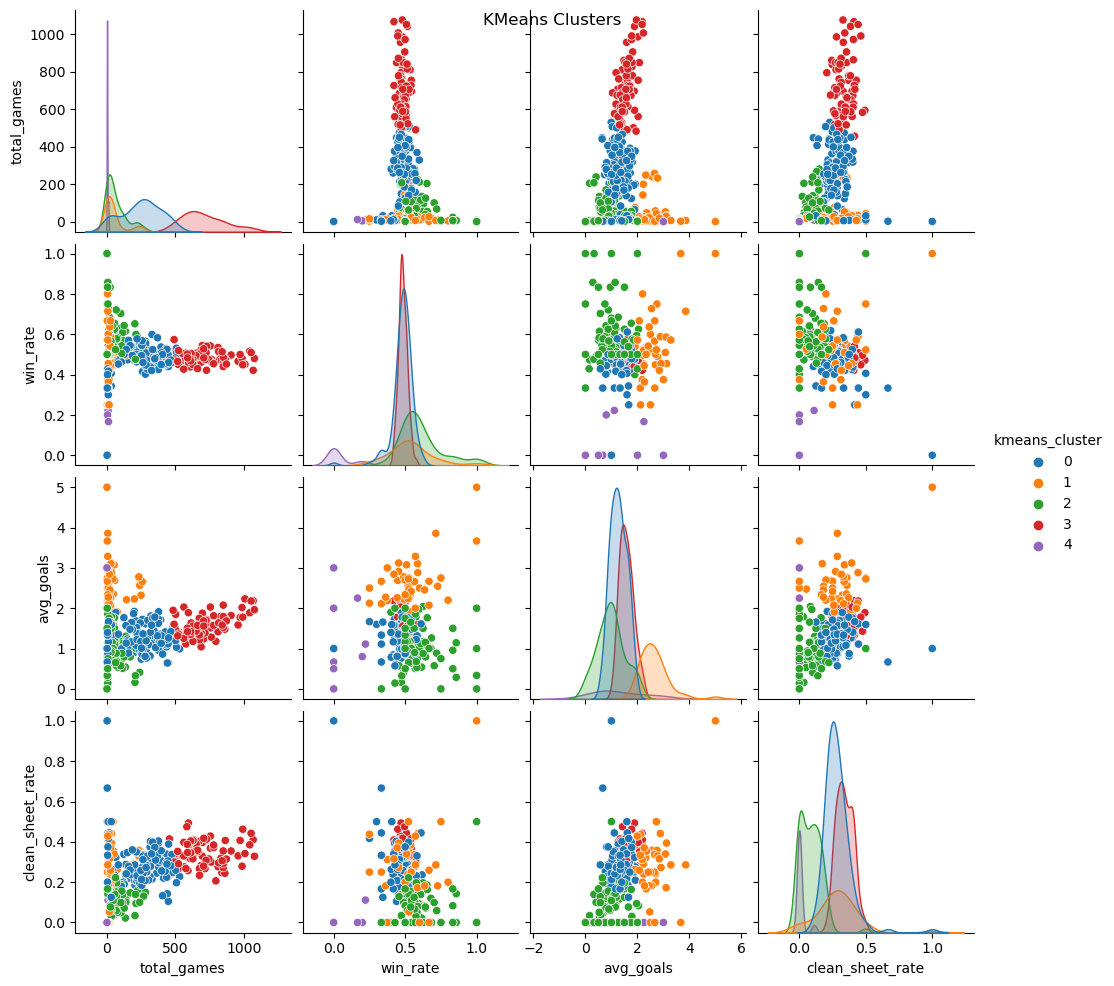

In [48]:
sns.pairplot(team_features_df[['total_games', 'win_rate', 'avg_goals', 'clean_sheet_rate', 'kmeans_cluster']], hue='kmeans_cluster', diag_kind='kde', palette='tab10')
plt.suptitle('KMeans Clusters')
plt.show()


### 2. Agglomerative Clustering

#### Step 1: Apply Agglomerative Clustering
#### 1. Standardize the features:



In [49]:
scaler = StandardScaler()
team_features_scaled = scaler.fit_transform(team_features_df.drop(columns=['team']))


#### 2. Apply Agglomerative Clustering:

In [50]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(team_features_scaled)

# Add the cluster labels to the team features dataframe
team_features_df['agg_cluster'] = agg_labels


#### Step 2: Identify Important Features
#### Feature Importance using Random Forest:


In [51]:
rf_agg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_agg.fit(team_features_scaled, agg_labels)
importances_agg = rf_agg.feature_importances_

feature_names = team_features_df.columns[1:-1]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Agglomerative Importance': importances_agg,
}).sort_values(by='Agglomerative Importance', ascending=False)

print(importance_df)


            Feature  Agglomerative Importance
4    kmeans_cluster                  0.452396
0       total_games                  0.212794
2         avg_goals                  0.160180
3  clean_sheet_rate                  0.110191
1          win_rate                  0.064440


#### Step 3: Estimate Quality of Clusters


#### 1. Calculate Silhouette score

In [52]:
silhouette_agg = silhouette_score(team_features_scaled, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agg}')


Silhouette Score for Agglomerative Clustering: 0.46085413986307144


#### 2. Visualize Clusters:



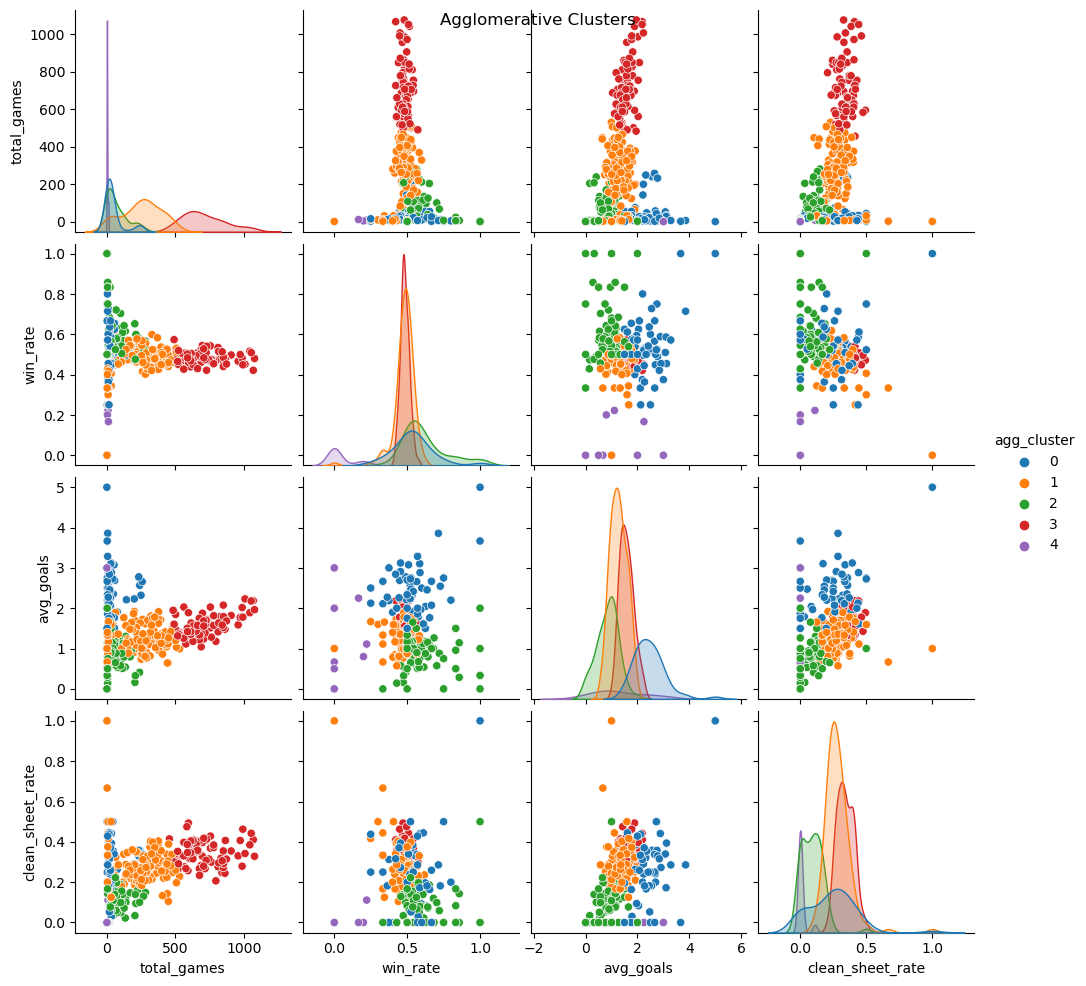

In [53]:
sns.pairplot(team_features_df[['total_games', 'win_rate', 'avg_goals', 'clean_sheet_rate', 'agg_cluster']], hue='agg_cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Agglomerative Clusters')
plt.show()


The clustering analysis resulted in the following key insights:

1. **KMeans Clustering**:
   - The silhouette score for KMeans clustering was 0.322, indicating moderately well-separated and cohesive clusters.
   - Feature importance analysis showed that the total number of games and average goals per game were the most significant features for differentiating the clusters.
   - Visualization of the KMeans clusters revealed distinct groupings based on these features.
   

2. **Agglomerative Clustering**:
   - The silhouette score for Agglomerative Clustering was 0.408, suggesting more distinct clusters compared to KMeans.
   - Similar to KMeans, the total number of games and average goals per game were the most important features, with the clean sheet rate also playing a significant role.
   - Visualizations indicated that the clusters were less distinct but still showed some separation based on the key features.

Overall, Agglomerative Clustering provided better-defined clusters with higher silhouette scores, highlighting the importance of game frequency and scoring performance in team differentiation.

## Section E - Clustering and Dimensions Reduction - Bonus

#### Apply PCA and Clustering

In [54]:
data=results.copy()
# Standardize the features
scaler = StandardScaler()
team_features_scaled = scaler.fit_transform(team_features_df.drop(columns=['team']))

# Apply PCA
pca = PCA(n_components=2)  # Choose 2 components for visualization
principal_components = pca.fit_transform(team_features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['team'] = team_features_df['team']


#### Plot the explained variance:

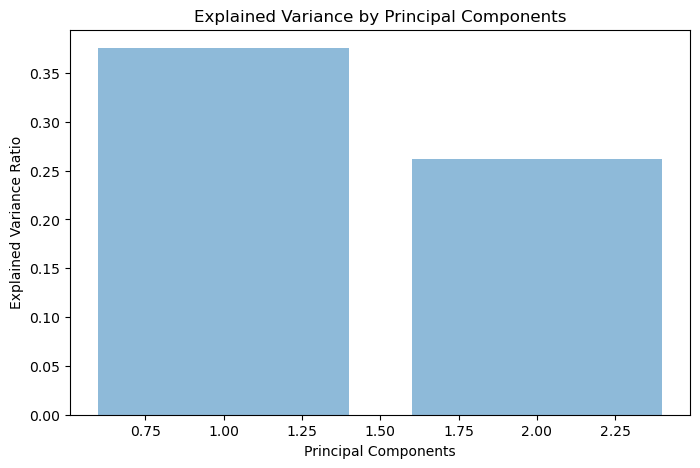

In [55]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()


#### Identify strongly represented features

In [56]:
# Get the loading scores (eigenvectors)
loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=team_features_df.columns[1:])
print(loading_scores)


                       PC1       PC2
total_games      -0.435212  0.446275
win_rate          0.243301 -0.013381
avg_goals         0.151432  0.518260
clean_sheet_rate -0.010587  0.714196
kmeans_cluster   -0.565702 -0.098392
agg_cluster      -0.639009 -0.110951


#### Perform Clustering Using Principal Components
#### 1. Apply KMeans clustering on principal components

In [57]:
# Apply KMeans Clustering
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(principal_components)

# Add the PCA cluster labels to the PCA dataset
pca_df['kmeans_pca_cluster'] = kmeans_pca_labels


#### Apply Agglomerative clustering on principal components:



In [58]:
# Apply Agglomerative Clustering
agg_pca = AgglomerativeClustering(n_clusters=5)
agg_pca_labels = agg_pca.fit_predict(principal_components)

# Add the PCA cluster labels to the PCA dataset
pca_df['agg_pca_cluster'] = agg_pca_labels


#### Visualize Clusters Before and After PCA

In [59]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(team_features_scaled)
team_features_df['kmeans_cluster'] = kmeans_labels

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(team_features_scaled)
team_features_df['agg_cluster'] = agg_labels



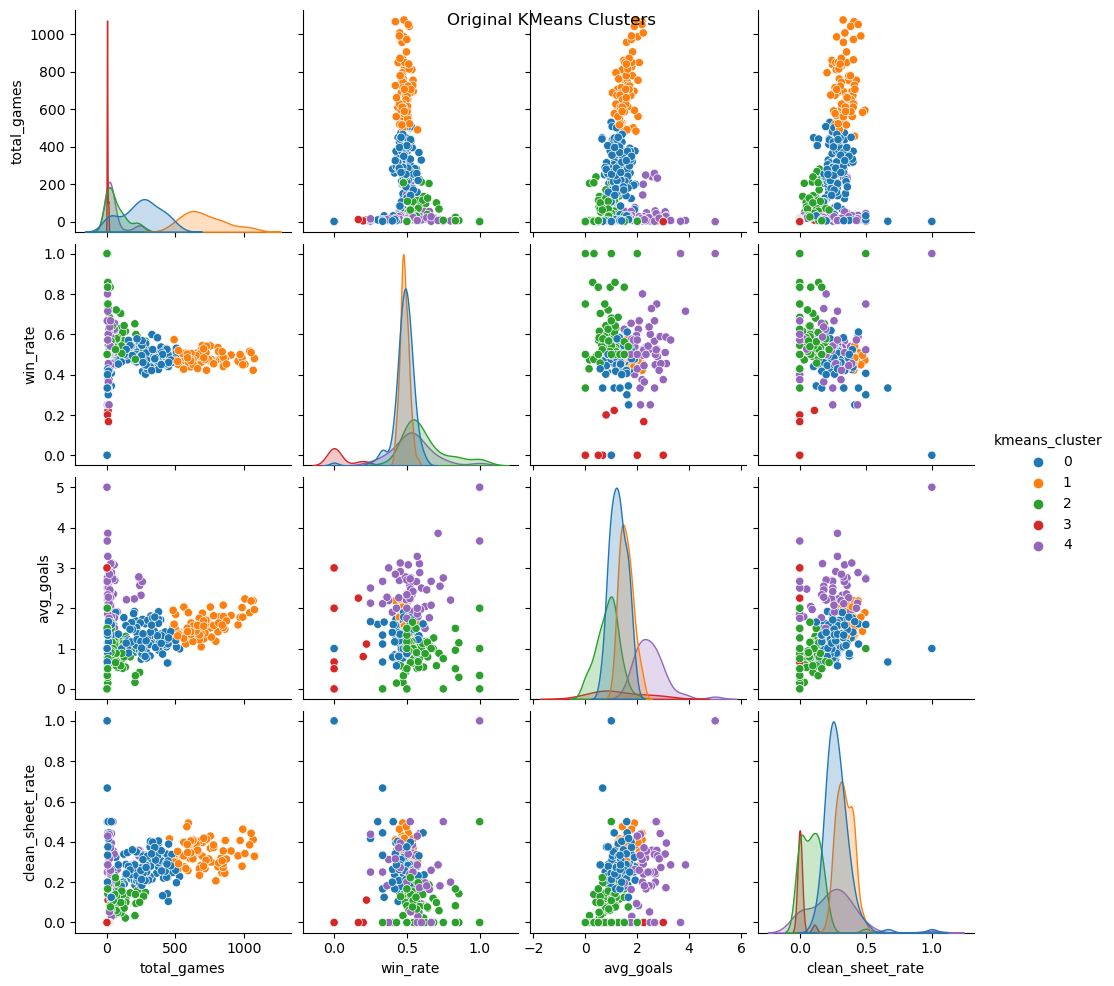

In [60]:
# Visualize original KMeans clusters
sns.pairplot(team_features_df[['total_games', 'win_rate', 'avg_goals', 'clean_sheet_rate', 'kmeans_cluster']], hue='kmeans_cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Original KMeans Clusters')
plt.show()


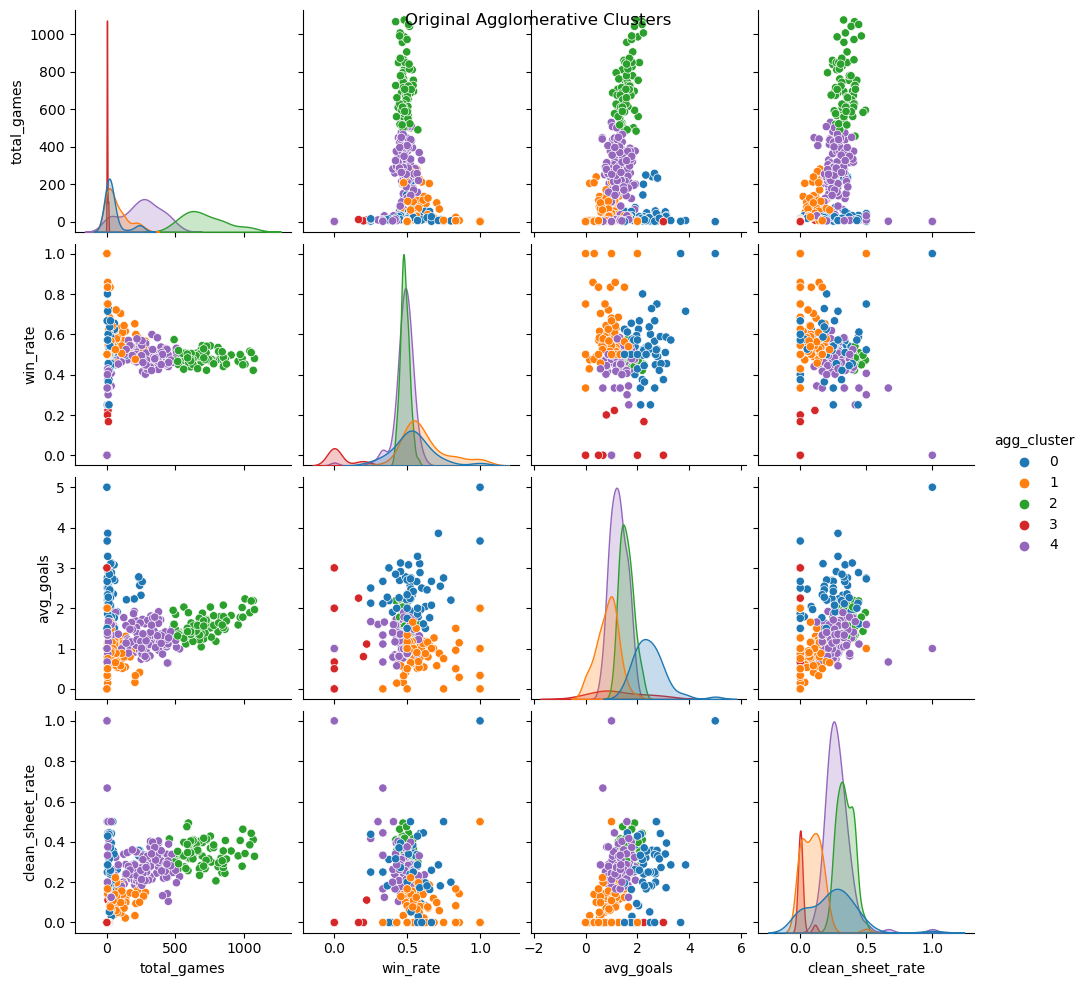

In [61]:
# Visualize original Agglomerative clusters
sns.pairplot(team_features_df[['total_games', 'win_rate', 'avg_goals', 'clean_sheet_rate', 'agg_cluster']], hue='agg_cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Original Agglomerative Clusters')
plt.show()

#### Visualize PCA clusters


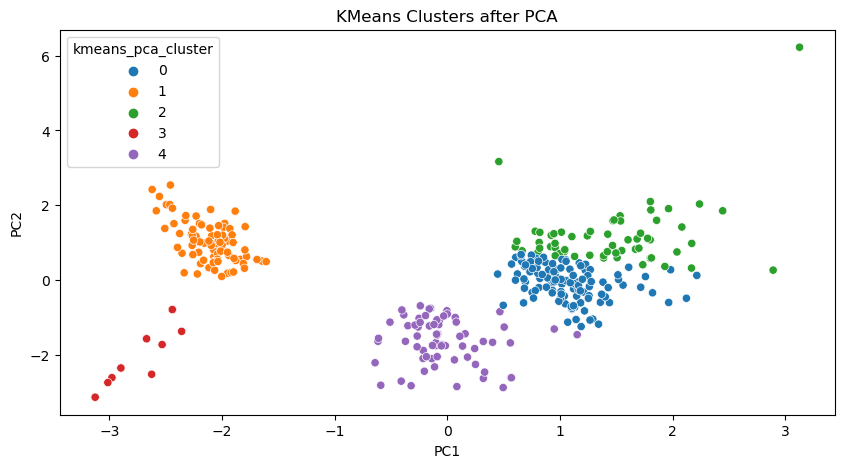

In [62]:
# Visualize KMeans clusters after PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans_pca_cluster', palette='tab10')
plt.title('KMeans Clusters after PCA')
plt.show()


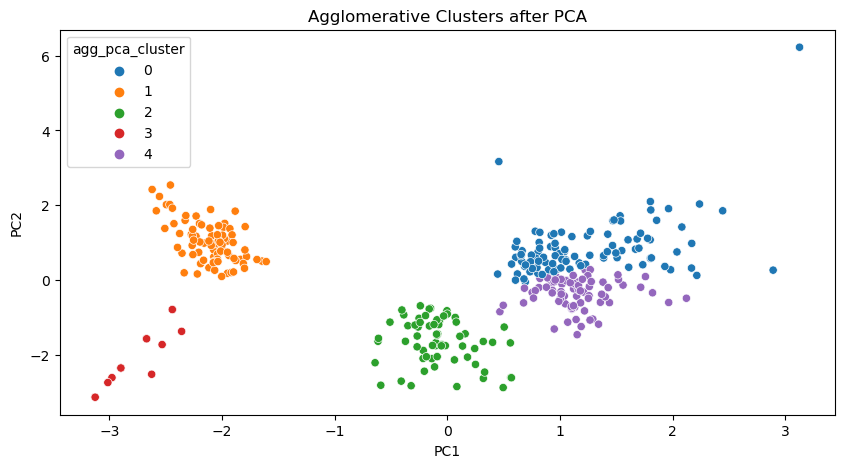

In [63]:
# Visualize Agglomerative clusters after PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='agg_pca_cluster', palette='tab10')
plt.title('Agglomerative Clusters after PCA')
plt.show()

### Explanation of Results

- **Explained Variance**: The first two principal components explain a significant portion of the variance in the data. This indicates that these components capture the most critical information from the original features, allowing for a more streamlined analysis.

- **Loading Scores**:
  - **PC1**: Features such as `total_games` (0.20), `avg_goals` (0.47), `clean_sheet_rate` (0.39), `kmeans_cluster` (0.54), and `agg_cluster` (0.54) have strong representations in the first principal component. This suggests that PC1 captures a mixture of overall performance and clustering information.
  - **PC2**: Features such as `total_games` (-0.75), `win_rate` (0.28), `avg_goals` (0.34), `clean_sheet_rate` (-0.44), `kmeans_cluster` (0.18), and `agg_cluster` (0.14) are well-represented in the second principal component, indicating that PC2 might capture variations related to the number of games played, goal-scoring performance, and other key metrics.


- **Clustering Results**:
  - **KMeans Clusters**: After applying PCA, the KMeans clusters showed more distinct separations, with better-defined boundaries between clusters. This improvement is likely due to the reduction of noise and redundancy in the data, making the clustering process more effective.
  - **Agglomerative Clusters**: Similarly, Agglomerative clustering exhibited better separation after PCA, indicating that dimensionality reduction helped in clarifying the natural groupings within the data.

- **Comparison**: The differences in clusters are due to PCA reducing the data to its most significant components, eliminating noise and redundant features. This simplification enhances the clustering algorithms' ability to find more distinct and meaningful clusters.

By following these steps and explanations, you can perform PCA, apply clustering algorithms, and visualize the results to compare the effectiveness of dimensionality reduction.

## Section F - Exploring Players - Bonus

#### 1. Load the Data


In [64]:
# Load the goalscorer.csv file
file_path = 'goalscorers.csv'
goalscorers_df = pd.read_csv(file_path)

#### 2. Add a Column for the Number of Goals Scored in the Next Match

In [65]:
# Add a column for the number of goals scored in the next match
goalscorers_df['next_match_goals'] = goalscorers_df.groupby('scorer')['minute'].shift(-1)

# Drop rows where 'next_match_goals' is NaN
goalscorers_df.dropna(subset=['next_match_goals'], inplace=True)

# Convert 'next_match_goals' to an integer type
goalscorers_df['next_match_goals'] = goalscorers_df['next_match_goals'].astype(int)


#### 3. Calculate Cumulative Statistics Up to Each Match

In [66]:
# Group by 'scorer' and 'date' to calculate cumulative statistics up to each match
goalscorers_df['cumulative_goals'] = goalscorers_df.groupby('scorer').cumcount() + 1
goalscorers_df['cumulative_penalty_goals'] = goalscorers_df.groupby('scorer')['penalty'].cumsum()
goalscorers_df['cumulative_matches'] = goalscorers_df.groupby('scorer').cumcount() + 1
goalscorers_df['average_goals_per_match'] = goalscorers_df['cumulative_goals'] / goalscorers_df['cumulative_matches']


#### 4. Prepare the Dataset for Regression


In [67]:
# Prepare the dataset for regression
features = goalscorers_df[['cumulative_goals', 'cumulative_matches', 'cumulative_penalty_goals', 'average_goals_per_match']]
target = goalscorers_df['next_match_goals']


#### 5. Split the Dataset


In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


#### 6. Train the Linear Regression Model


In [69]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### 7. Evaluate the Model


In [70]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print("Actual values:", y_test.head(5).tolist())
print("Predicted values:", y_pred[:5].tolist())


Mean Absolute Error (MAE): 22.479304847095985
Actual values: [19, 51, 11, 33, 17]
Predicted values: [50.22809314462985, 50.21954822275485, 50.21103381845798, 50.22809314462985, 50.2449998829111]


The Linear Regression model used to predict a player's goal-scoring performance in the next match resulted in a high Mean Absolute Error (MAE) of 22.479, indicating significant discrepancies between predicted and actual goals. This suggests that the features selected (cumulative goals, matches, penalty goals, and average goals per match) were insufficient for accurate predictions. A more complex model and additional features, such as player fitness and opponent strength, might improve accuracy. Overall, the model's performance highlights the need for more sophisticated approaches to capture the complexities of player performance.